# Lectura de imágenes con OpenCV y rawpy


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rawpy
import imageio.v2 as imageio
from pathlib import Path

# Función auxiliar para mostrar imágenes en escala de grises o color
def mostrar_img(img, titulo="Imagen", cmap=None):
    plt.figure(figsize=(5,5))
    if len(img.shape) == 2:  # Escala de grises
        plt.imshow(img, cmap='gray')
    else:  # Color (BGR a RGB para mostrar correctamente)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis('off')
    plt.show()

---

## Lectura de imágenes comunes con OpenCV

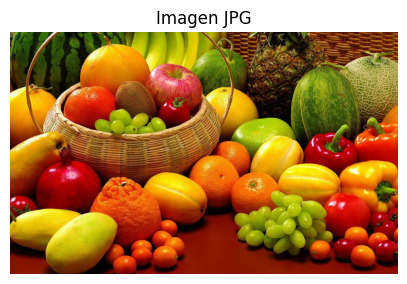

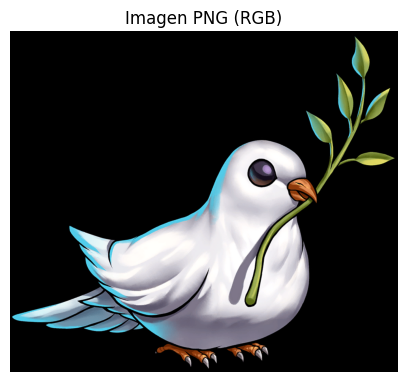

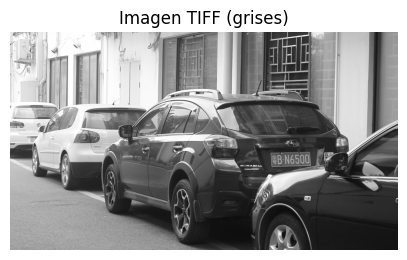

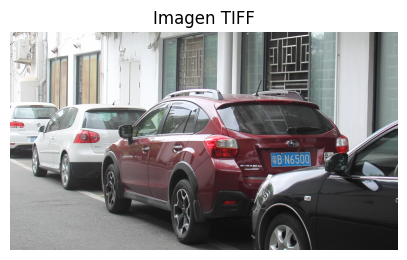

In [2]:
# Ruta a las imágenes (ajustar según tu carpeta local)
carpeta = Path("imagenes")

# JPG
img_jpg = cv2.imread(str(carpeta / "frutas.jpg"))
mostrar_img(img_jpg, "Imagen JPG")

# PNG con canal alfa (transparencia)
img_png = cv2.imread(str(carpeta / "373-3730435_paloma-dibujo-png.png"), cv2.IMREAD_UNCHANGED)
mostrar_img(img_png[:, :, :3], "Imagen PNG (RGB)")

# TIFF en escala de grises
img_tiff = cv2.imread(str(carpeta / "DPP0357.TIF"), cv2.IMREAD_GRAYSCALE)
mostrar_img(img_tiff, "Imagen TIFF (grises)")

# TIFF en escala de color
img_tiff2 = cv2.imread(str(carpeta / "DPP0357.TIF"), cv2.IMREAD_UNCHANGED)
mostrar_img(img_tiff2, "Imagen TIFF")

---

## Lectura de imágenes RAW

OpenCV no puede leer directamente formatos RAW de cámaras digitales. Usaremos `rawpy` para convertirlos a un arreglo NumPy.

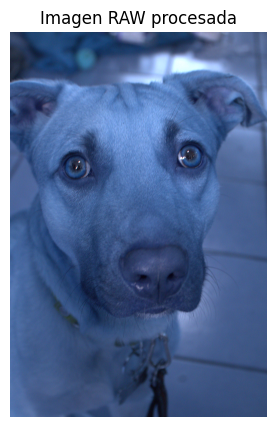

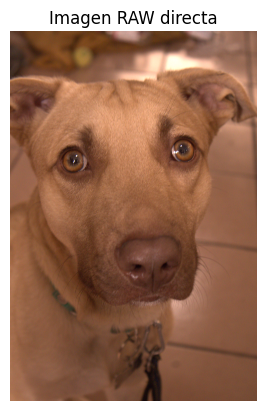

In [3]:
# Ejemplo con un archivo RAW (CR3 de Canon, NEF de Nikon, etc.)
ruta_raw = carpeta / "IMG_0531.CR3"

with rawpy.imread(str(ruta_raw)) as raw:
    rgb = raw.postprocess()

# raw.postprocess() devuelve un arreglo RGB de 8 bits
mostrar_img(rgb, "Imagen RAW procesada")

plt.imshow(rgb)
plt.title("Imagen RAW directa")
plt.axis('off')
plt.show()

---

## Notas importantes

- **Espacios de color**: OpenCV usa BGR por defecto para imágenes en color. Al mostrar con Matplotlib, es necesario convertir a RGB.
- **Canales alfa**: Si la imagen tiene transparencia (por ejemplo, PNG con 4 canales), OpenCV la carga con el canal alfa incluido si usamos `cv2.IMREAD_UNCHANGED`.
- **Compatibilidad RAW**: Los formatos RAW varían entre fabricantes; `rawpy` está basado en `libraw`, que ofrece soporte para una amplia variedad de cámaras.

---

## Conclusión

En este ejemplo hemos cubierto la lectura de:

- Imágenes estándar soportadas por OpenCV (JPG, PNG, TIFF, BMP)
- Archivos RAW usando bibliotecas externas

Esto nos permite trabajar con una amplia variedad de formatos en un flujo de procesamiento digital de imágenes.